# ***Processing , Analysing and Visualizing IMDB Movies Dataset***

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
df=pd.read_csv('imdb_top_1000.csv')

# Basic Information about Data

In [4]:
df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [5]:
df.shape

(1000, 16)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


In [7]:
df.describe()

,IMDB_Rating,Meta_score,No_of_Votes
count,1000.000000,843.000000,1.000000e+03
mean,7.949300,77.971530,2.736929e+05
std,0.275491,12.376099,3.273727e+05
min,7.600000,28.000000,2.508800e+04
25%,7.700000,70.000000,5.552625e+04
50%,7.900000,79.000000,1.385485e+05
75%,8.100000,87.000000,3.741612e+05
max,9.300000,100.000000,2.343110e+06


In [8]:
df.isna().sum()

Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

## column cleanup

In [9]:
df.columns

Index(['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate',
       'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director',
       'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')

In [10]:
df.columns=[col.lower() for col in df]
df.columns

Index(['poster_link', 'series_title', 'released_year', 'certificate',
       'runtime', 'genre', 'imdb_rating', 'overview', 'meta_score', 'director',
       'star1', 'star2', 'star3', 'star4', 'no_of_votes', 'gross'],
      dtype='object')

# Data Processing

In [11]:
df['certificate'].value_counts()

U           234
A           197
UA          175
R           146
PG-13        43
PG           37
Passed       34
G            12
Approved     11
TV-PG         3
GP            2
TV-14         1
16            1
TV-MA         1
Unrated       1
U/A           1
Name: certificate, dtype: int64

In [12]:
df['meta_score'].value_counts()

76.0    32
84.0    29
90.0    29
80.0    27
73.0    27
        ..
28.0     1
36.0     1
46.0     1
30.0     1
41.0     1
Name: meta_score, Length: 63, dtype: int64

In [13]:
#To know the top 10 categories in Genre Column 
df['genre'].value_counts().head(10)

Drama                           85
Drama, Romance                  37
Comedy, Drama                   35
Comedy, Drama, Romance          31
Action, Crime, Drama            30
Biography, Drama, History       28
Crime, Drama, Thriller          28
Crime, Drama, Mystery           27
Crime, Drama                    26
Animation, Adventure, Comedy    24
Name: genre, dtype: int64

In [14]:
#Remove commas in gross columns and convert it into float type
df['gross']=df['gross'].str.replace(',','').astype(float)
print(df['gross'].dtype)

float64


In [15]:
#filling nan values with gross mean values
df['gross']=df['gross'].fillna(df['gross'].mean())

# Data Analysis and Visualization

In [42]:
# Average IMDb Rating
average_rating_imdb = df['imdb_rating'].mean()
average_rating_meta = df['meta_score'].mean()

# Most Common Genres
most_common_genres = df['genre'].value_counts().idxmax()

# Distribution of Box Office Earnings
box_office_distribution = df['gross'].describe()

# Display Descriptive Statistics
print(f"Average IMDb Rating: {average_rating_imdb:.2f}")
print(f"Average Meta Score Rating: {average_rating_meta:.2f}")
print(f"Most Common Genres: {most_common_genres}")
print("\nDistribution of Box Office Earnings:")
print(box_office_distribution)

Average IMDb Rating: 7.95
Average Meta Score Rating: 77.97
Most Common Genres: Drama

Distribution of Box Office Earnings:
count    1.000000e+03
mean     6.803475e+07
std      1.000371e+08
min      1.305000e+03
25%      5.012919e+06
50%      4.238945e+07
75%      6.803475e+07
max      9.366622e+08
Name: gross, dtype: float64


In [45]:
hidden_gems= df[df["no_of_votes"] < 100000]  # Adjust threshold as needed
hidden_gems = hidden_gems.sort_values("imdb_rating", ascending=False).head(10)
print("Potential Hidden Gems:")
print(hidden_gems[["series_title", "imdb_rating", "no_of_votes"]])

Potential Hidden Gems:
                  series_title  imdb_rating  no_of_votes
18                    Hamilton          8.6        55291
30                     Seppuku          8.6        42004
20             Soorarai Pottru          8.6        54995
53                  Capharnaüm          8.4        62635
54   Ayla: The Daughter of War          8.4        34112
55                Vikram Vedha          8.4        28401
76                       Anand          8.4        30273
77           Tengoku to jigoku          8.4        34357
92              Babam ve Oglum          8.3        78925
121                      Ikiru          8.3        68463


In [46]:
hidden_gems = df[df["no_of_votes"] < 100000]  # Adjust threshold as needed
hidden_gems = hidden_gems.sort_values("meta_score", ascending=False).head(10)
print("Potential Hidden Gems:")
print(hidden_gems[["series_title", "meta_score", "no_of_votes"]])

Potential Hidden Gems:
                      series_title  meta_score  no_of_votes
260          Trois couleurs: Rouge       100.0        90729
423                 Il conformista       100.0        27067
559                      Notorious       100.0        92306
274            Fanny och Alexander       100.0        57784
440         Sweet Smell of Success       100.0        28137
438                  Touch of Evil        99.0        98431
442        The Night of the Hunter        99.0        81980
714              The Lady Vanishes        98.0        47400
492  4 luni, 3 saptamâni si 2 zile        97.0        56625
462           Bronenosets Potemkin        97.0        53054


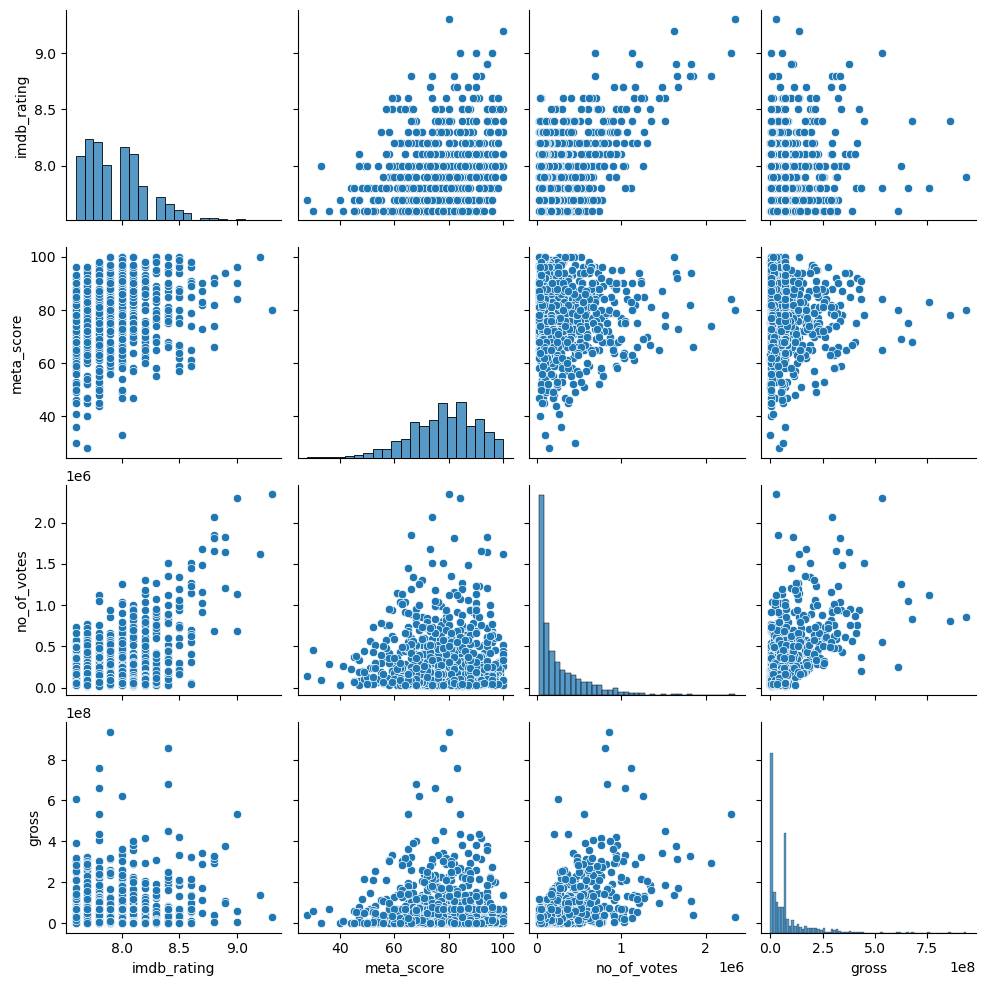

In [16]:
# We can observe the correlation relationships of all numerical columns.
sns.pairplot(df)
plt.show()

In [17]:
#Top 10 series by IMDB ranking
top_10_imdb_series=df.sort_values(by='imdb_rating',ascending=False).head(10)
print(top_10_imdb_series[['series_title','imdb_rating']])

                                         series_title  imdb_rating
0                            The Shawshank Redemption          9.3
1                                       The Godfather          9.2
2                                     The Dark Knight          9.0
3                              The Godfather: Part II          9.0
4                                        12 Angry Men          9.0
5       The Lord of the Rings: The Return of the King          8.9
6                                        Pulp Fiction          8.9
7                                    Schindler's List          8.9
10  The Lord of the Rings: The Fellowship of the Ring          8.8
11                                       Forrest Gump          8.8


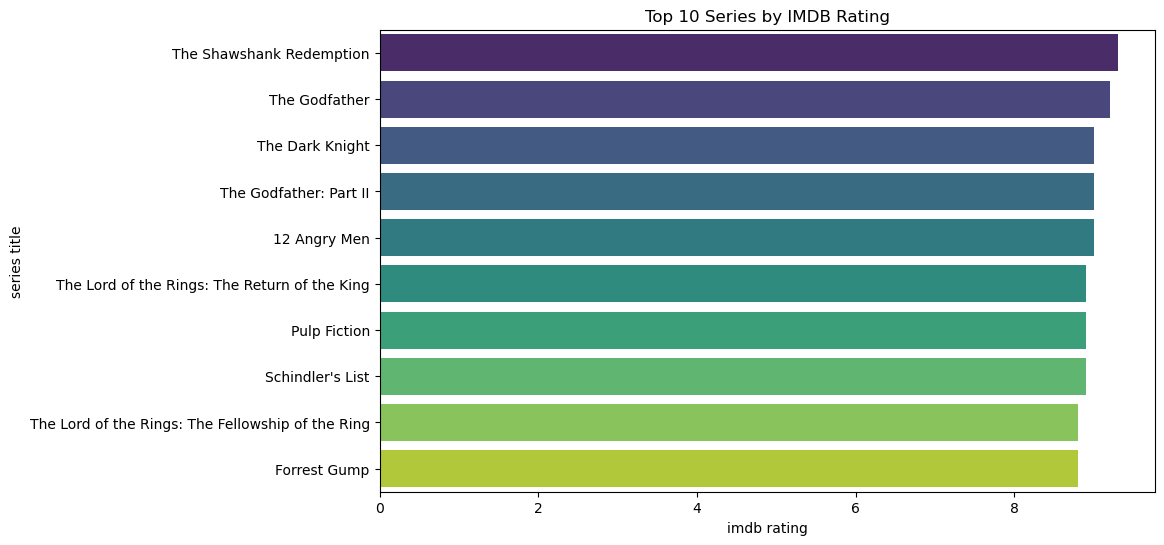

In [27]:
plt.figure(figsize=(10,6))
sns.barplot(x='imdb_rating', y='series_title', data=top_10_imdb_series, palette='viridis', hue='series_title', dodge=False)
plt.title('Top 10 Series by IMDB Rating')
plt.xlabel('imdb rating')
plt.ylabel('series title')
plt.legend().set_visible(False)  
plt.show()

In [22]:
#genre_by_meta_score
genre_by_meta_score = df.sort_values(by= 'meta_score', ascending=False).head(10)
print(genre_by_meta_score[['genre', 'meta_score']])

                         genre  meta_score
440           Drama, Film-Noir       100.0
81           Mystery, Thriller       100.0
50         Drama, Romance, War       100.0
260    Drama, Mystery, Romance       100.0
559  Drama, Film-Noir, Romance       100.0
274                      Drama       100.0
423                      Drama       100.0
1                 Crime, Drama       100.0
491                      Drama       100.0
124             Drama, Mystery       100.0


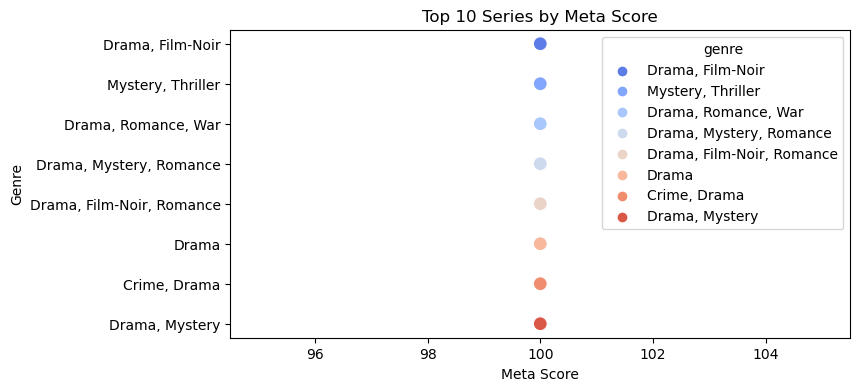

In [25]:
plt.figure(figsize=(8, 4))
sns.scatterplot(x='meta_score', y='genre', data=genre_by_meta_score, hue='genre', palette='coolwarm', s=100)
plt.title('Top 10 Series by Meta Score')
plt.xlabel('Meta Score')
plt.ylabel('Genre')
plt.show()

In [29]:
#genre by imdb score
genre_by_imdb_score = df.sort_values(by= 'imdb_rating', ascending=False).head(10)
print(genre_by_imdb_score[['genre', 'imdb_rating']])

                        genre  imdb_rating
0                       Drama          9.3
1                Crime, Drama          9.2
2        Action, Crime, Drama          9.0
3                Crime, Drama          9.0
4                Crime, Drama          9.0
5    Action, Adventure, Drama          8.9
6                Crime, Drama          8.9
7   Biography, Drama, History          8.9
10   Action, Adventure, Drama          8.8
11             Drama, Romance          8.8


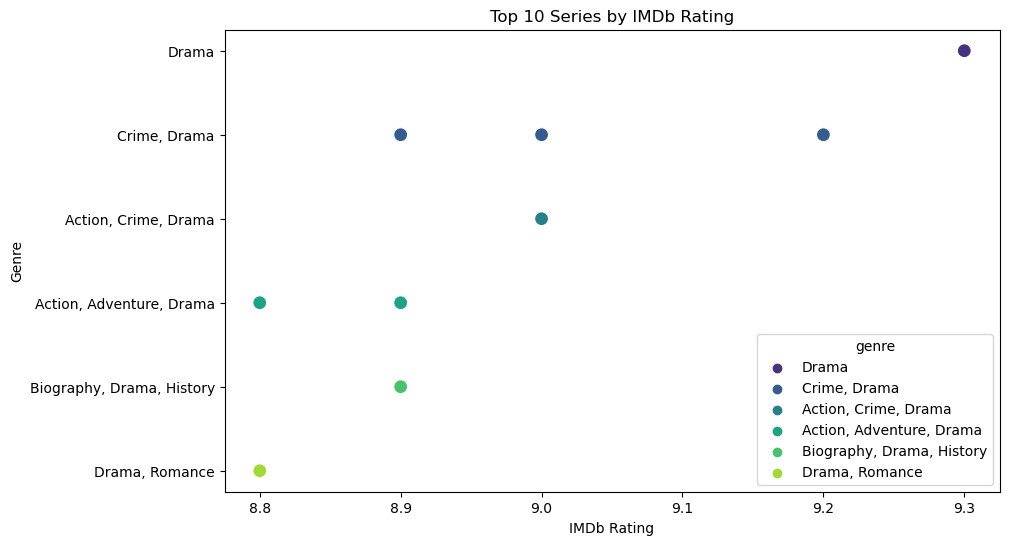

In [30]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='imdb_rating', y='genre', data=genre_by_imdb_score, hue='genre', palette='viridis', s=100)
plt.title('Top 10 Series by IMDb Rating')
plt.xlabel('IMDb Rating')
plt.ylabel('Genre')
plt.show()

In [32]:
#Total Series by Released Year
total_series_by_year = df['released_year'].value_counts().sort_index()
total_series_by_year

1920     1
1921     1
1922     1
1924     1
1925     2
        ..
2017    22
2018    19
2019    23
2020     6
PG       1
Name: released_year, Length: 100, dtype: int64

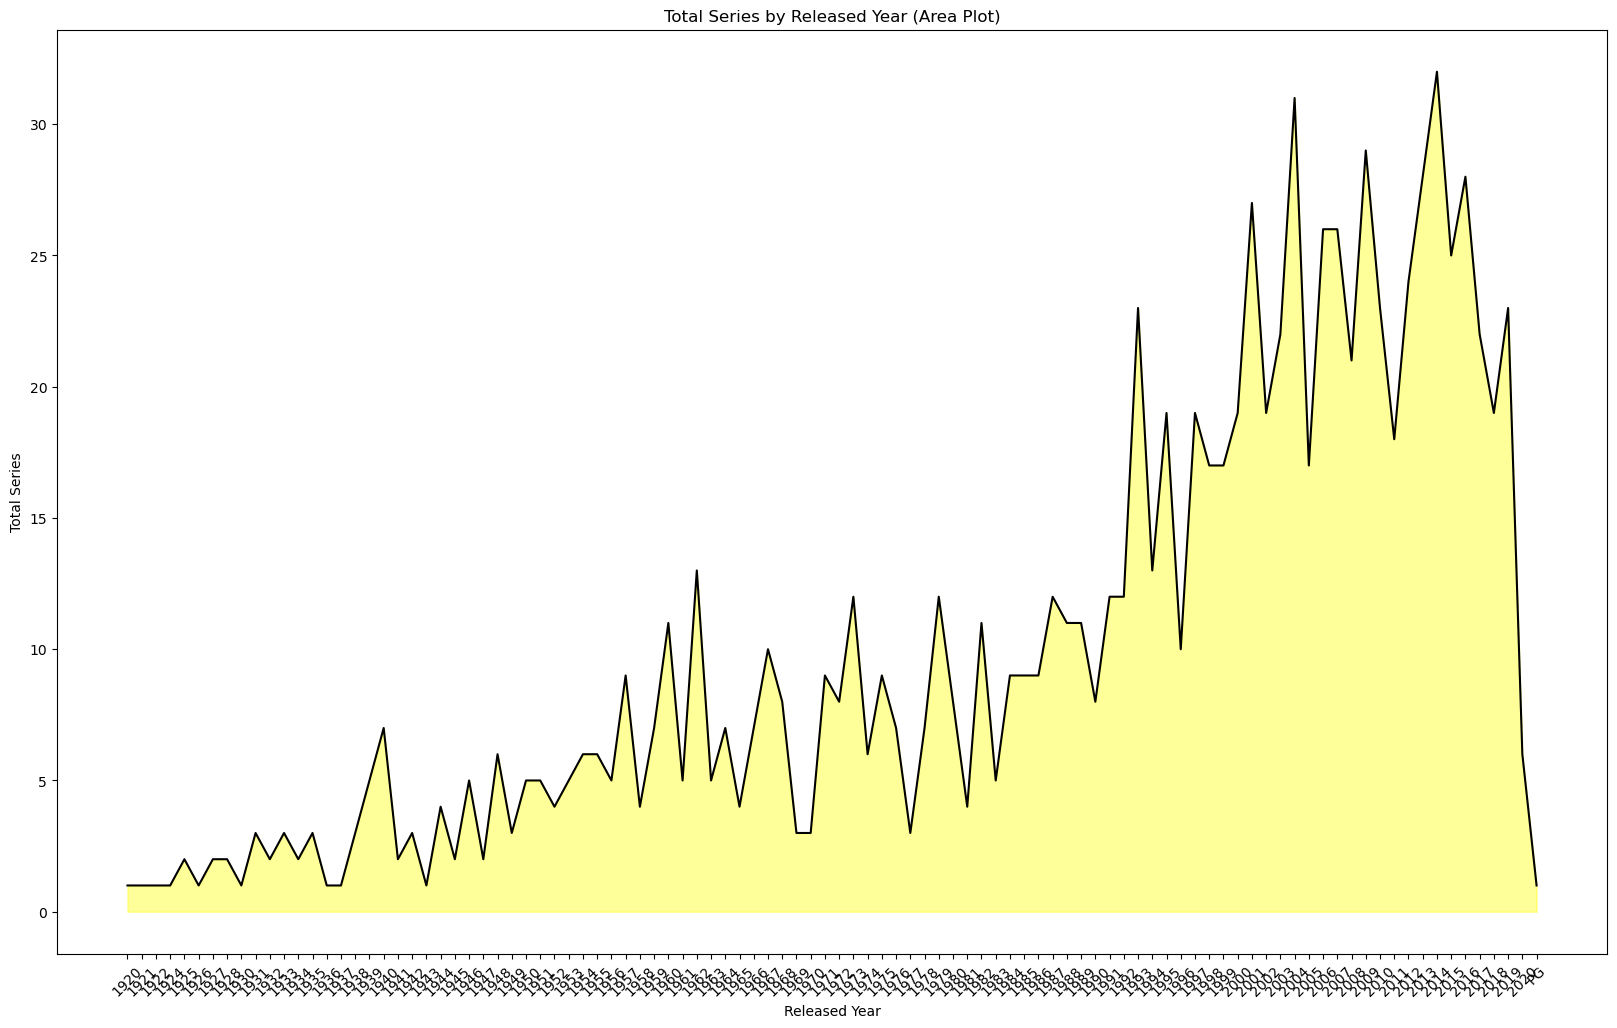

In [33]:
plt.figure(figsize=(20, 12))
sns.lineplot(x=total_series_by_year.index, y=total_series_by_year.values, color='black')
plt.fill_between(total_series_by_year.index, total_series_by_year.values, color='yellow', alpha=0.4)
plt.title('Total Series by Released Year (Area Plot)')
plt.xlabel('Released Year')
plt.ylabel('Total Series')
plt.xticks(rotation=45)
plt.show()

In [34]:
#Total Gross By Years
total_gross_by_year = df.groupby('released_year')['gross'].sum()

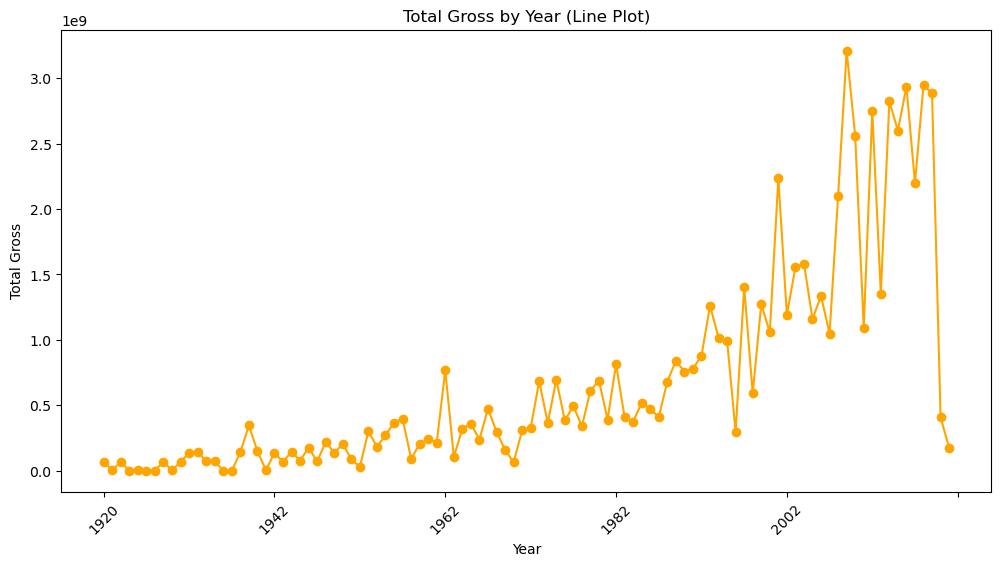

In [35]:
plt.figure(figsize=(12, 6))
total_gross_by_year.plot(kind='line', marker='o', color='orange')
plt.title('Total Gross by Year (Line Plot)')
plt.xlabel('Year')
plt.ylabel('Total Gross')
plt.xticks(rotation=45)
plt.show()

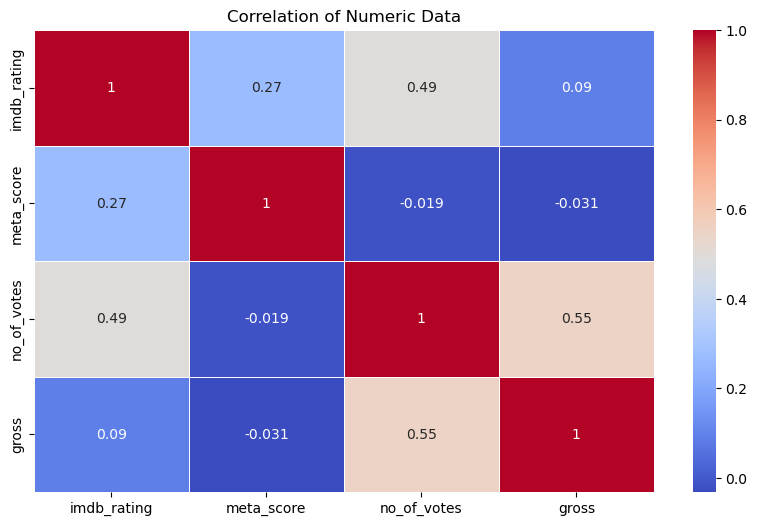

In [36]:
#Correlation of all data
numeric_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation of Numeric Data')
plt.show()

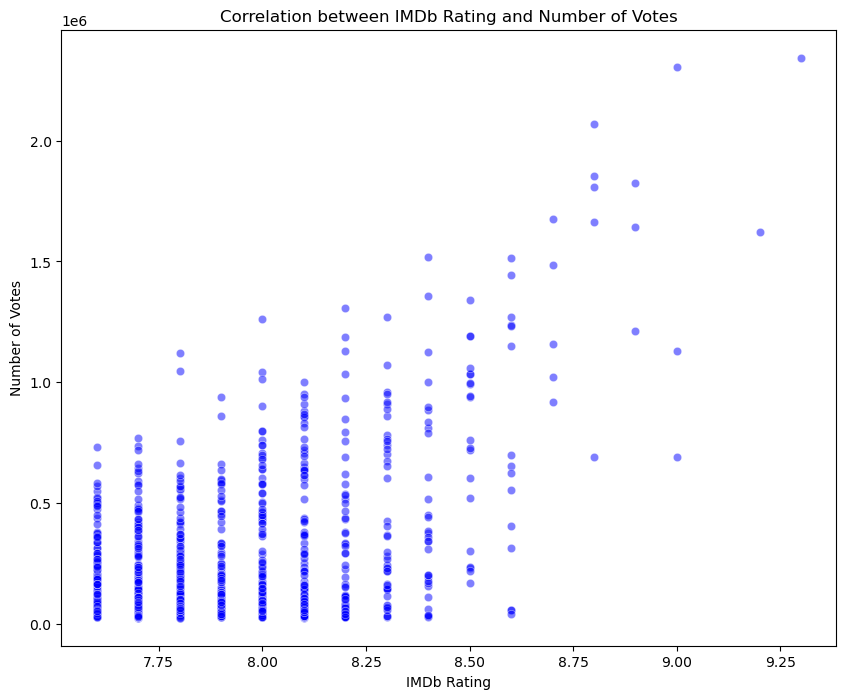

In [37]:
#Correlation between IMDB Rating and Number of Votes
plt.figure(figsize=(10, 8))
sns.scatterplot(x='imdb_rating', y='no_of_votes', data=df, color='blue', alpha=0.5)
plt.title('Correlation between IMDb Rating and Number of Votes')
plt.xlabel('IMDb Rating')
plt.ylabel('Number of Votes')
plt.show()

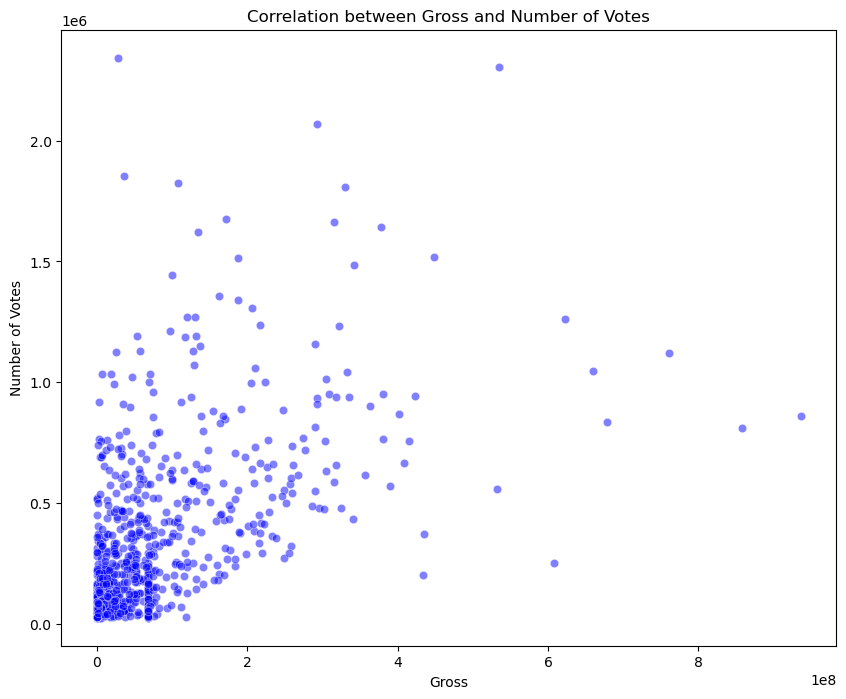

In [38]:
#Correlation Between Gross and Number of Votes¶
plt.figure(figsize=(10, 8))
sns.scatterplot(x='gross', y='no_of_votes', data=df, color='blue', alpha=0.5)
plt.title('Correlation between Gross and Number of Votes')
plt.xlabel('Gross')
plt.ylabel('Number of Votes')
plt.show()